/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


new shape:  (348, 325)
2024-01-04 03:56:23,538 [INFO] ** TORCH GPU version installed and working. **
>>> GPU activated? True
2024-01-04 03:56:23,539 [INFO] >>bact_phase_omni<< model set to be used
2024-01-04 03:56:23,540 [INFO] ** TORCH GPU version installed and working. **
2024-01-04 03:56:23,540 [INFO] >>>> using GPU
func CellposeModel be called
2024-01-04 03:56:23,698 [INFO] using dataparallel
_run_cp be called


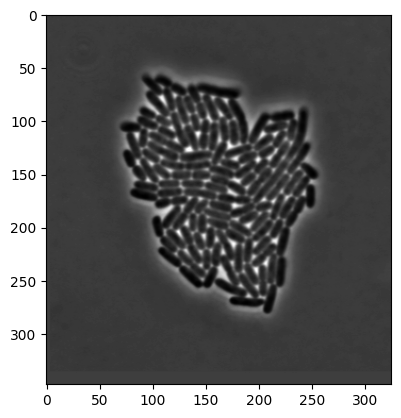

In [1]:
import hierarchy
import segementation
from pathlib import Path
import os
from cellpose_omni import io
import omnipose

file = "/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t134xy5c1.tif"
#file = "/Users/sherryyang/Documents/wiggins-lab/data/1027/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00023xy0c1.tif"
#file = "/Users/sherryyang/Documents/wiggins-lab/data/1021/raw_im/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00023xy0c1.tif"


from cellpose_omni import io, transforms
from omnipose.utils import normalize99
img = io.imread(file)


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

img = transforms.move_min_dim(img) # move the channel dimension last
if len(img.shape)>2:
    # imgs[k] = img[:,:,1] # could pick out a specific channel
    img = np.mean(img,axis=-1) # or just turn into grayscale 
    
img = normalize99(img)
# imgs[k] = np.pad(imgs[k],10,'edge')
print('new shape: ', img.shape)
plt.imshow(img,cmap='gray')


from cellpose_omni import models
from cellpose_omni.models import MODEL_NAMES


# Import dependencies
import numpy as np
from cellpose_omni import models, core

# This checks to see if you have set up your GPU properly.
# CPU performance is a lot slower, but not a problem if you 
# are only processing a few images.
use_GPU = core.use_gpu()
print('>>> GPU activated? {}'.format(use_GPU))

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 300
plt.style.use('dark_background')


model_name = 'bact_phase_omni'
model = models.CellposeModel(gpu=use_GPU, model_type=model_name)


import os
os.environ['PYTORCH_MPS_HIGH_WATERMARK_RATIO'] = '0.0'  # Adjust the ratio as needed


params = {
    'channels' : [0, 0], 
    'mask_threshold': 0.0, 
    'flow_threshold': 0.0, 
    'diameter': 0.0, 
    'invert': False, 
    'cluster': True, 
    'net_avg': False, 
    'do_3D': False, 
    'omni': True,
    'compute_masks': False,
}

masks, flows, styles = model.eval(img,**params)
[RGB_dP, dP, cellprob, p, bd, tr, affinity, bounds] = flows
dP = dP.squeeze()
cellprob = cellprob.squeeze()


In [2]:
hier = segementation.computer_hierarchy(cellprob, dP)

In [3]:
arr = hier.find_leaves()

In [4]:
len(arr)

132

In [5]:
np.unique([1,2,5,5,5,5])

array([1, 2, 5])